<a href="https://colab.research.google.com/github/phatnguyenthuan1502/Remaining-Useful-Life-Assessment-of-Bypass-and-Blocking-Diodes-in-Photovoltaic-Arrays/blob/main/WT_CNN_GRU_time_series_analysis_(data_3_1_1)(split_0)(WT_use_cA_and_cD)(WT_1_level)(2_CNN_model)(CNN_uses_LeakyReLU)(1_fully_connected_layers)(find_LC_from_temp_and_Nf).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openpyxl

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

In [26]:
import pandas as pd
book = pd.ExcelFile('Data for ML TT-DB3-1-1.xlsx')
sheet = pd.read_excel(book, 'Sheet1')

temp = sheet.loc[:,"Temperature"][:485]
cur = sheet.loc[:,"Current (A)"][:485]
nf = sheet.loc[:,"Lf1"][:485]
lc = sheet.loc[:,"AD1"][:485]


print(pd.Series(temp).array)
print(pd.Series(cur).array)
print(pd.Series(nf).array)
print(pd.Series(lc).array)

<PandasArray>
["TT 41'", "TT 44'", "TT 47'", "TT 50'", "TT 53'", "TT 56'", "TT 59'",
 "TT 62'", "TT 65'", "TT 68'",
 ...
 "TT 47'", "TT 50'", "TT 38'", "TT 40'", "TT 43'", "TT 46'", "TT 49'",
 "TT 52'", "TT 54'", "TT 57'"]
Length: 485, dtype: object
<PandasArray>
[0.39210526315789473,  0.7242105263157894,  1.0563157894736843,
   1.388421052631579,  1.7205263157894737,  2.0526315789473686,
   2.384736842105263,   2.716842105263158,   3.048947368421053,
  3.3810526315789473,
 ...
  1.0050000000000001,                1.28,                0.42,
  0.6257142857142857,  0.8314285714285714,  1.0371428571428571,
  1.2428571428571429,  1.4485714285714286,  1.6542857142857144,
                1.86]
Length: 485, dtype: float64
<PandasArray>
[ 979611.0535306311,  782150.2197052066,  636065.0081440957,
 495985.12177099194, 406514.03537471074, 324452.82590361737,
 257775.92452570048, 210110.49354382508, 162192.52105122514,
  135607.0134797413,
 ...
    650723.30925528,  546186.9026236447, 1178646.478

In [27]:
temp = pd.Series(temp).array
cur = pd.Series(cur).array
nf = pd.Series(nf).array
lc = pd.Series(lc).array

print(temp)
print(cur)
print(nf)
print(lc)

<PandasArray>
["TT 41'", "TT 44'", "TT 47'", "TT 50'", "TT 53'", "TT 56'", "TT 59'",
 "TT 62'", "TT 65'", "TT 68'",
 ...
 "TT 47'", "TT 50'", "TT 38'", "TT 40'", "TT 43'", "TT 46'", "TT 49'",
 "TT 52'", "TT 54'", "TT 57'"]
Length: 485, dtype: object
<PandasArray>
[0.39210526315789473,  0.7242105263157894,  1.0563157894736843,
   1.388421052631579,  1.7205263157894737,  2.0526315789473686,
   2.384736842105263,   2.716842105263158,   3.048947368421053,
  3.3810526315789473,
 ...
  1.0050000000000001,                1.28,                0.42,
  0.6257142857142857,  0.8314285714285714,  1.0371428571428571,
  1.2428571428571429,  1.4485714285714286,  1.6542857142857144,
                1.86]
Length: 485, dtype: float64
<PandasArray>
[ 979611.0535306311,  782150.2197052066,  636065.0081440957,
 495985.12177099194, 406514.03537471074, 324452.82590361737,
 257775.92452570048, 210110.49354382508, 162192.52105122514,
  135607.0134797413,
 ...
    650723.30925528,  546186.9026236447, 1178646.478

In [28]:
temp_new = []
for str_temp in temp:
  str_new = str_temp.replace("TT ","")
  str_new = str_new.replace("'","")
  temp_new.append(int(str_new))

In [29]:
temp_new

[41,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 77,
 80,
 83,
 86,
 89,
 92,
 40,
 43,
 46,
 49,
 52,
 55,
 58,
 61,
 64,
 67,
 70,
 73,
 76,
 79,
 39,
 42,
 45,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 75,
 78,
 81,
 84,
 87,
 90,
 93,
 96,
 99,
 102,
 105,
 108,
 111,
 114,
 117,
 120,
 38,
 41,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 77,
 80,
 83,
 86,
 89,
 92,
 38,
 41,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 77,
 80,
 83,
 86,
 89,
 92,
 95,
 98,
 101,
 104,
 107,
 110,
 113,
 116,
 119,
 122,
 125,
 39,
 42,
 45,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 75,
 78,
 81,
 84,
 87,
 90,
 93,
 96,
 99,
 102,
 105,
 108,
 111,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 41,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 39,
 42,
 45,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 75,
 78,
 81,
 84,
 87,
 40,
 43,
 46,
 49,
 52,
 55,
 58,
 61,
 64,
 67,
 70,
 73,
 76,
 79,
 42,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 39,
 42,


In [30]:
nf = nf/1000

print(nf)

<PandasArray>
[ 979.6110535306311,  782.1502197052066,  636.0650081440956,
 495.98512177099195,  406.5140353747107,  324.4528259036174,
  257.7759245257005, 210.11049354382507, 162.19252105122513,
 135.60701347974128,
 ...
  650.7233092552799,  546.1869026236446, 1178.6464785172404,
 1012.0244948388391,  816.1572757907737,  654.0188899911711,
  528.8584405108949,   419.150505929184, 344.01732289123447,
  303.6837258638779]
Length: 485, dtype: float64


In [31]:
lc = lc*1000000

print(lc)

<PandasArray>
[  3.12493869762179,  4.226966081049842,  4.876924176944798,
  6.254302155778809, 3.0026480034715295,  9.560837720205367,
 12.033865544403291, 10.576445682179632, 19.125671123558252,
  7.584942711868595,
 ...
 1.7448083881120746,  7.192723607432326, 1.3084234355316426,
  3.412929500800552,   3.23709092231295, 1.7295150773868313,
  2.855592283208608,  3.493460448150104, 11.313069525636537,
 11.760355485856406]
Length: 485, dtype: float64


In [32]:
temp_new = np.array(temp_new)
cur = np.array(cur)
nf = np.array(nf)
lc = np.array(lc)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from numpy import array
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
import tensorflow as tf
import pywt

In [34]:
def get_wave(data, wavelet, num_level, mode):
  return pywt.wavedec(data, wavelet, level = num_level, mode = mode)

In [35]:
wavelet = 'db1'
mode = 'periodic'
num_level = 1

In [36]:
a = [1,2,3,4,5,6,7,8,9]
get_wave(a, wavelet, num_level, mode)

[array([ 2.12132034,  4.94974747,  7.77817459, 10.60660172,  7.07106781]),
 array([-0.70710678, -0.70710678, -0.70710678, -0.70710678,  5.65685425])]

In [37]:
a = [1,2]
get_wave(a, wavelet, num_level, mode)

[array([2.12132034]), array([-0.70710678])]

In [38]:
a = [3,4]
get_wave(a, wavelet, num_level, mode)

[array([4.94974747]), array([-0.70710678])]

In [39]:
a = [5,6]
get_wave(a, wavelet, num_level, mode)

[array([7.77817459]), array([-0.70710678])]

In [40]:
a = [7,8]
get_wave(a, wavelet, num_level, mode)

[array([10.60660172]), array([-0.70710678])]

In [41]:
a = [9,1]
get_wave(a, wavelet, num_level, mode)

[array([7.07106781]), array([5.65685425])]

In [42]:
# multivariate data preparation
from numpy import array
from numpy import hstack

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [43]:
# define input sequence
in_seq1 = temp_new
in_seq2 = cur
in_seq3 = nf
out_seq = lc
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq2.reshape((len(in_seq3), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, in_seq3, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

(485, 1, 3) (485,)
[[41.          0.39210526  0.39210526]] 3.12493869762179
[[44.          0.72421053  0.72421053]] 4.226966081049842
[[47.          1.05631579  1.05631579]] 4.876924176944798
[[50.          1.38842105  1.38842105]] 6.254302155778809
[[53.          1.72052632  1.72052632]] 3.0026480034715295
[[56.          2.05263158  2.05263158]] 9.560837720205367
[[59.          2.38473684  2.38473684]] 12.033865544403291
[[62.          2.71684211  2.71684211]] 10.576445682179632
[[65.          3.04894737  3.04894737]] 19.125671123558252
[[68.          3.38105263  3.38105263]] 7.584942711868595
[[71.          3.71315789  3.71315789]] 11.165566682162147
[[74.          4.04526316  4.04526316]] 11.885283264234987
[[77.          4.37736842  4.37736842]] 20.633869591227675
[[80.          4.70947368  4.70947368]] 19.37145561367273
[[83.          5.04157895  5.04157895]] 20.348422847129388
[[86.          5.37368421  5.37368421]] 22.759651674900496
[[89.          5.70578947  5.70578947]] 36.42

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=False)

In [45]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=False)

In [46]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

348
348
88
88
49
49


In [47]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [48]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [49]:
for i in range(len(X_train)):
	print(X_train[i], y_train[i])

[[41.          0.39210525  0.39210525]] 3.1249387
[[44.         0.7242105  0.7242105]] 4.226966
[[47.         1.0563158  1.0563158]] 4.876924
[[50.        1.388421  1.388421]] 6.254302
[[53.         1.7205263  1.7205263]] 3.002648
[[56.         2.0526316  2.0526316]] 9.560838
[[59.         2.3847368  2.3847368]] 12.033866
[[62.         2.7168422  2.7168422]] 10.576446
[[65.         3.0489473  3.0489473]] 19.125671
[[68.         3.3810527  3.3810527]] 7.584943
[[71.        3.713158  3.713158]] 11.165566
[[74.         4.0452633  4.0452633]] 11.885283
[[77.         4.3773685  4.3773685]] 20.63387
[[80.         4.7094736  4.7094736]] 19.371456
[[83.        5.041579  5.041579]] 20.348423
[[86.         5.3736844  5.3736844]] 22.759651
[[89.         5.7057896  5.7057896]] 36.423283
[[92.         6.0378947  6.0378947]] 35.5106
[[40.    0.05  0.05]] 0.7044262
[[43.          0.38384616  0.38384616]] 1.1393685
[[46.         0.7176923  0.7176923]] 1.5356468
[[49.         1.0515385  1.0515385]] 3.3

In [50]:
for i in range(len(X_val)):
	print(X_val[i], y_val[i])

[[71.         2.7758822  2.7758822]] 6.94582
[[74.        2.954706  2.954706]] 11.278415
[[77.         3.1335294  3.1335294]] 12.007647
[[80.        3.312353  3.312353]] 11.832707
[[83.         3.4911764  3.4911764]] 18.195879
[[86.    3.67  3.67]] 30.13983
[[3.6e+01 2.0e-02 2.0e-02]] 1.7535557
[[39.          0.27347827  0.27347827]] 0.88146895
[[42.         0.5269565  0.5269565]] 0.61937004
[[45.         0.7804348  0.7804348]] 0.5925809
[[48.        1.033913  1.033913]] 0.8254352
[[51.         1.2873913  1.2873913]] 0.7354312
[[54.         1.5408696  1.5408696]] 0.83887786
[[57.         1.7943479  1.7943479]] 0.89132625
[[60.        2.047826  2.047826]] 1.0219301
[[63.         2.3013043  2.3013043]] 1.3600758
[[66.         2.5547826  2.5547826]] 2.3172932
[[69.        2.808261  2.808261]] 3.3727255
[[72.         3.0617392  3.0617392]] 3.9165287
[[75.         3.3152175  3.3152175]] 5.0963697
[[78.         3.5686955  3.5686955]] 5.712223
[[81.         3.8221738  3.8221738]] 7.5989723
[[

In [51]:
train_temp_wave = np.array(get_wave(X_train.T[0][0], wavelet, num_level, mode))
train_cur_wave = np.array(get_wave(X_train.T[1][0], wavelet, num_level, mode))
train_nf_wave = np.array(get_wave(X_train.T[2][0], wavelet, num_level, mode))
train_lc_wave = np.array(get_wave(y_train, wavelet, num_level, mode))
val_temp_wave = np.array(get_wave(X_val.T[0][0], wavelet, num_level, mode))
val_cur_wave = np.array(get_wave(X_val.T[1][0], wavelet, num_level, mode))
val_nf_wave = np.array(get_wave(X_val.T[2][0], wavelet, num_level, mode))
val_lc_wave = np.array(get_wave(y_val, wavelet, num_level, mode))
test_temp_wave = np.array(get_wave(X_test.T[0][0], wavelet, num_level, mode))
test_cur_wave = np.array(get_wave(X_test.T[1][0], wavelet, num_level, mode))
test_nf_wave = np.array(get_wave(X_test.T[2][0], wavelet, num_level, mode))
test_lc_wave = np.array(get_wave(y_test, wavelet, num_level, mode))

In [52]:
train_temp_wave_new = np.concatenate((train_temp_wave[0], train_temp_wave[1]))
train_cur_wave_new = np.concatenate((train_cur_wave[0], train_cur_wave[1]))
train_nf_wave_new = np.concatenate((train_nf_wave[0], train_nf_wave[1]))
train_lc_wave_new = np.concatenate((train_lc_wave[0], train_lc_wave[1]))
val_temp_wave_new = np.concatenate((val_temp_wave[0], val_temp_wave[1]))
val_cur_wave_new = np.concatenate((val_cur_wave[0], val_cur_wave[1]))
val_nf_wave_new = np.concatenate((val_nf_wave[0], val_nf_wave[1]))
val_lc_wave_new = np.concatenate((val_lc_wave[0], val_lc_wave[1]))
test_temp_wave_new = np.concatenate((test_temp_wave[0], test_temp_wave[1]))
test_cur_wave_new = np.concatenate((test_cur_wave[0], test_cur_wave[1]))
test_nf_wave_new = np.concatenate((test_nf_wave[0], test_nf_wave[1]))
test_lc_wave_new = np.concatenate((test_lc_wave[0], test_lc_wave[1]))

In [53]:
hstack((train_temp_wave_new, train_cur_wave_new, train_nf_wave_new, train_lc_wave_new))

array([60.104073  , 68.589355  , 77.07464   , ..., -0.66429424,
       -0.50683975, -0.36190534], dtype=float32)

In [54]:
#TRAIN_SET
# define input sequence
in_seq1 = train_temp_wave_new
in_seq2 = train_cur_wave_new
in_seq3 = train_nf_wave_new
out_seq = train_lc_wave_new
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq2.reshape((len(in_seq3), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset_train = hstack((in_seq1, in_seq2, in_seq3, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X_train_wave, y_train_wave = split_sequences(dataset_train, n_steps)
print(X_train_wave.shape, y_train_wave.shape)
# summarize the data
for i in range(len(X_train_wave)):
	print(X_train_wave[i], y_train_wave[i])

(348, 1, 3) (348,)
[[60.104073    0.78935444  0.78935444]] 5.1985817
[[68.589355   1.7286899  1.7286899]] 7.870965
[[77.07464    2.6680255  2.6680255]] 8.883726
[[85.55992   3.607361  3.607361]] 15.987904
[[94.0452     4.5466967  4.5466967]] 18.887257
[[102.53049     5.4860325   5.4860325]] 16.299412
[[111.01576     6.4253674   6.4253674]] 28.288036
[[119.501045   7.364703   7.364703]] 30.482012
[[127.98633    8.304039   8.304039]] 50.864937
[[58.689865    0.30677554  0.30677554]] 1.3037597
[[67.17514   1.251035  1.251035]] 3.4877207
[[75.66042    2.1952946  2.1952946]] 6.1829195
[[84.145706  3.139554  3.139554]] 7.9639215
[[92.63098    4.0838137  4.0838137]] 13.394541
[[101.11627     5.0280733   5.0280733]] 22.311237
[[109.60155     5.9723325   5.9723325]] 39.677334
[[57.27565     0.23046443  0.23046443]] 0.70695806
[[65.760925  0.926048  0.926048]] 0.8349025
[[74.246216   1.6216315  1.6216315]] 1.4214332
[[82.73149   2.317215  2.317215]] 1.7885473
[[91.216774   3.0127985  3.0127985]]

In [55]:
#VAL_SET
# define input sequence
in_seq1 = val_temp_wave_new
in_seq2 = val_cur_wave_new
in_seq3 = val_nf_wave_new
out_seq = val_lc_wave_new
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset_val = hstack((in_seq1, in_seq2, in_seq3, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X_val_wave, y_val_wave = split_sequences(dataset_val, n_steps)
print(X_val_wave.shape, y_val_wave.shape)
# summarize the data
for i in range(len(X_val_wave)):
	print(X_val_wave[i], y_val_wave[i])

(88, 1, 3) (88,)
[[102.53049     4.0521374   4.0521374]] 12.886479
[[111.01576    4.557927   4.557927]] 16.857676
[[119.501045   5.063716   5.063716]] 34.17851
[[53.033005    0.20752047  0.20752047]] 1.8632437
[[61.518288    0.92446524  0.92446524]] 0.8569787
[[70.00357  1.64141  1.64141]] 1.1036992
[[78.488846   2.3583548  2.3583548]] 1.223439
[[86.97414    3.0752995  3.0752995]] 1.6843325
[[95.45941    3.7922444  3.7922444]] 4.023451
[[103.944695    4.5091896   4.5091896]] 6.373081
[[112.42998     5.2261333   5.2261333]] 9.4124365
[[120.91525    5.943079   5.943079]] 14.2911
[[129.40054    6.660023   6.660023]] 38.76761
[[137.88582     7.3769684   7.3769684]] 67.29668
[[146.3711     8.093913   8.093913]] 138.39474
[[55.861435    0.28233764  0.28233764]] 0.68064916
[[64.34671    0.9591398  0.9591398]] 0.5253023
[[72.832     1.635942  1.635942]] 0.8386133
[[81.317276   2.3127441  2.3127441]] 1.0999947
[[89.80256    2.9895465  2.9895465]] 1.3340082
[[98.28784   3.666349  3.666349]] 1.97

In [56]:
#TEST_SET
# define input sequence
in_seq1 = test_temp_wave_new
in_seq2 = test_cur_wave_new
in_seq3 = test_nf_wave_new
out_seq = test_lc_wave_new
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset_test = hstack((in_seq1, in_seq2, in_seq3, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X_test_wave, y_test_wave = split_sequences(dataset_test, n_steps)
print(X_test_wave.shape, y_test_wave.shape)
# summarize the data
for i in range(len(X_test_wave)):
	print(X_test_wave[i], y_test_wave[i])

(50, 1, 3) (50,)
[[67.17514    2.5548651  2.5548651]] 0.9738883
[[75.66042    3.1258538  3.1258538]] 0.88472295
[[84.145706   3.6968424  3.6968424]] 1.5052006
[[92.63098    4.2678313  4.2678313]] 2.068202
[[101.11627     4.8388205   4.8388205]] 3.3852868
[[109.60155    5.409809   5.409809]] 5.1822176
[[118.08683    5.980798   5.980798]] 27.3171
[[57.27565    1.2715065  1.2715065]] 1.3313346
[[65.760925   2.2691698  2.2691698]] 1.2125382
[[74.246216   3.2668333  3.2668333]] 1.4263752
[[82.73149   4.264497  4.264497]] 2.0421133
[[91.216774   5.2621603  5.2621603]] 2.6850967
[[99.70206    6.2598233  6.2598233]] 3.5984478
[[108.18733     7.2574863   7.2574863]] 5.585558
[[116.67262   8.25515   8.25515]] 11.126987
[[125.1579     9.252813   9.252813]] 19.348053
[[133.64319   10.250477  10.250477]] 48.38256
[[142.12846  11.24814  11.24814]] 175.22604
[[55.861435    0.44901282  0.44901282]] 2.838384
[[64.34671    1.2268302  1.2268302]] 2.9991932
[[62.225395   1.2020814  1.2020814]] 6.011219
[[

In [57]:
def get_cA(wave, num_level):
  return(wave[:len(wave)//(2*num_level)])

def get_cD(wave, level, num_level):
  i = 0
  temp_wave = wave
  while(i<level):
    cD = temp_wave[len(temp_wave)//2:]
    temp_wave = temp_wave[:len(temp_wave)//2]
    i = i + 1
  return cD

In [58]:
get_cA(X_train_wave, num_level)

array([[[ 60.104073  ,   0.78935444,   0.78935444]],

       [[ 68.589355  ,   1.7286899 ,   1.7286899 ]],

       [[ 77.07464   ,   2.6680255 ,   2.6680255 ]],

       [[ 85.55992   ,   3.607361  ,   3.607361  ]],

       [[ 94.0452    ,   4.5466967 ,   4.5466967 ]],

       [[102.53049   ,   5.4860325 ,   5.4860325 ]],

       [[111.01576   ,   6.4253674 ,   6.4253674 ]],

       [[119.501045  ,   7.364703  ,   7.364703  ]],

       [[127.98633   ,   8.304039  ,   8.304039  ]],

       [[ 58.689865  ,   0.30677554,   0.30677554]],

       [[ 67.17514   ,   1.251035  ,   1.251035  ]],

       [[ 75.66042   ,   2.1952946 ,   2.1952946 ]],

       [[ 84.145706  ,   3.139554  ,   3.139554  ]],

       [[ 92.63098   ,   4.0838137 ,   4.0838137 ]],

       [[101.11627   ,   5.0280733 ,   5.0280733 ]],

       [[109.60155   ,   5.9723325 ,   5.9723325 ]],

       [[ 57.27565   ,   0.23046443,   0.23046443]],

       [[ 65.760925  ,   0.926048  ,   0.926048  ]],

       [[ 74.246216  ,   1.6

In [59]:
get_cD(X_train_wave, 1, num_level)

array([[[-2.1213207 , -0.23483387, -0.23483387]],

       [[-2.1213226 , -0.2348339 , -0.2348339 ]],

       [[-2.1213226 , -0.23483396, -0.23483396]],

       [[-2.1213188 , -0.23483396, -0.23483396]],

       [[-2.1213188 , -0.23483396, -0.23483396]],

       [[-2.1213188 , -0.23483396, -0.23483396]],

       [[-2.1213226 , -0.23483396, -0.23483396]],

       [[-2.1213226 , -0.2348342 , -0.2348342 ]],

       [[-2.1213226 , -0.23483372, -0.23483372]],

       [[-2.1213207 , -0.23606487, -0.23606487]],

       [[-2.1213188 , -0.23606485, -0.23606485]],

       [[-2.1213226 , -0.23606497, -0.23606497]],

       [[-2.1213226 , -0.23606479, -0.23606479]],

       [[-2.1213188 , -0.23606503, -0.23606503]],

       [[-2.1213188 , -0.23606467, -0.23606467]],

       [[-2.1213188 , -0.23606491, -0.23606491]],

       [[-2.1213207 , -0.1738959 , -0.1738959 ]],

       [[-2.1213188 , -0.1738959 , -0.1738959 ]],

       [[-2.1213188 , -0.17389584, -0.17389584]],

       [[-2.1213226 , -0.173895

In [60]:
from keras import backend as K
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true - y_pred) / y_true)))

In [61]:
X_train_wave.shape

(348, 1, 3)

In [62]:
# the dataset knows the number of features, e.g. 2
n_features = X_train_wave.shape[2]
# steps
n_steps = 1
# define model
model_cA = Sequential()
model_cA.add(Conv1D(filters=64, kernel_size=1, activation=tf.keras.layers.LeakyReLU(), input_shape=(n_steps, n_features)))
model_cA.add(MaxPooling1D(pool_size=1))
#model_cA.add(LSTM(4,return_sequences=True))
model_cA.add(GRU(50, input_shape=(1, n_features)))
model_cA.add(Flatten())
model_cA.add(Dense(40, activation='relu'))
model_cA.add(Dense(2))
model_cA.add(Dense(1))
model_cA.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', tf.keras.metrics.RootMeanSquaredError(name='rmse'), rmspe, 'mape'])

In [63]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('log.csv', append=True, separator=';')

In [64]:
# fit model
history_cA = model_cA.fit(get_cA(X_train_wave, num_level), get_cA(y_train_wave, num_level), epochs=2000, verbose=2, callbacks=[csv_logger], validation_data=(get_cA(X_val_wave, num_level), get_cA(y_val_wave, num_level)))

Epoch 1/2000
6/6 - 3s - loss: 7863.6069 - mse: 7863.6069 - mae: 35.1585 - rmse: 88.6770 - rmspe: 0.9424 - mape: 94.3266 - val_loss: 3118.8406 - val_mse: 3118.8406 - val_mae: 23.1648 - val_rmse: 55.8466 - val_rmspe: 0.8181 - val_mape: 79.3129 - 3s/epoch - 454ms/step
Epoch 2/2000
6/6 - 0s - loss: 7845.4219 - mse: 7845.4219 - mae: 34.8878 - rmse: 88.5744 - rmspe: 0.8950 - mape: 89.0673 - val_loss: 3107.0635 - val_mse: 3107.0635 - val_mae: 22.9146 - val_rmse: 55.7410 - val_rmspe: 0.7431 - val_mape: 70.2924 - 41ms/epoch - 7ms/step
Epoch 3/2000
6/6 - 0s - loss: 7823.5889 - mse: 7823.5889 - mae: 34.5757 - rmse: 88.4510 - rmspe: 0.8600 - mape: 83.7919 - val_loss: 3089.7373 - val_mse: 3089.7373 - val_mae: 22.6017 - val_rmse: 55.5854 - val_rmspe: 0.6807 - val_mape: 63.4126 - 56ms/epoch - 9ms/step
Epoch 4/2000
6/6 - 0s - loss: 7797.0430 - mse: 7797.0430 - mae: 34.2181 - rmse: 88.3009 - rmspe: 0.8140 - mape: 77.9951 - val_loss: 3074.5054 - val_mse: 3074.5054 - val_mae: 22.3824 - val_rmse: 55.4482 

In [65]:
# the dataset knows the number of features, e.g. 2
n_features = X_train_wave.shape[2]
# steps
n_steps = 1
# define model
model_cD = Sequential()
model_cD.add(Conv1D(filters=64, kernel_size=1, activation=tf.keras.layers.LeakyReLU(), input_shape=(n_steps, n_features)))
model_cD.add(MaxPooling1D(pool_size=1))
#model_cD.add(LSTM(4,return_sequences=True))
model_cD.add(GRU(50, input_shape=(1, n_features)))
model_cD.add(Flatten())
model_cD.add(Dense(40, activation='relu'))
model_cD.add(Dense(2))
model_cD.add(Dense(1))
model_cD.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', tf.keras.metrics.RootMeanSquaredError(name='rmse'), rmspe, 'mape'])

In [66]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('log.csv', append=True, separator=';')

In [67]:
# fit model
history_cD = model_cD.fit(get_cD(X_train_wave, 1, num_level), get_cD(y_train_wave, 1, num_level), epochs=2000, verbose=2, callbacks=[csv_logger], validation_data=(get_cD(X_val_wave, 1, num_level), get_cD(y_val_wave, 1, num_level)))

Epoch 1/2000
6/6 - 3s - loss: 3232.3911 - mse: 3232.3911 - mae: 13.3881 - rmse: 56.8541 - rmspe: 2.2579 - mape: 143.6633 - val_loss: 1541.4005 - val_mse: 1541.4005 - val_mae: 9.8889 - val_rmse: 39.2607 - val_rmspe: 6.8353 - val_mape: 408.4787 - 3s/epoch - 448ms/step
Epoch 2/2000
6/6 - 0s - loss: 3218.7935 - mse: 3218.7935 - mae: 13.2989 - rmse: 56.7344 - rmspe: 4.9372 - mape: 234.6959 - val_loss: 1521.3583 - val_mse: 1521.3583 - val_mae: 9.8639 - val_rmse: 39.0046 - val_rmspe: 11.0261 - val_mape: 640.5970 - 52ms/epoch - 9ms/step
Epoch 3/2000
6/6 - 0s - loss: 3197.2661 - mse: 3197.2661 - mae: 13.2615 - rmse: 56.5444 - rmspe: 6.8756 - mape: 322.0670 - val_loss: 1505.7896 - val_mse: 1505.7896 - val_mae: 9.9373 - val_rmse: 38.8045 - val_rmspe: 16.1908 - val_mape: 934.1299 - 55ms/epoch - 9ms/step
Epoch 4/2000
6/6 - 0s - loss: 3176.4182 - mse: 3176.4182 - mae: 13.3182 - rmse: 56.3597 - rmspe: 9.8518 - mape: 455.0661 - val_loss: 1492.2417 - val_mse: 1492.2417 - val_mae: 10.0664 - val_rmse: 38

In [68]:
import matplotlib.pyplot as plt
import math

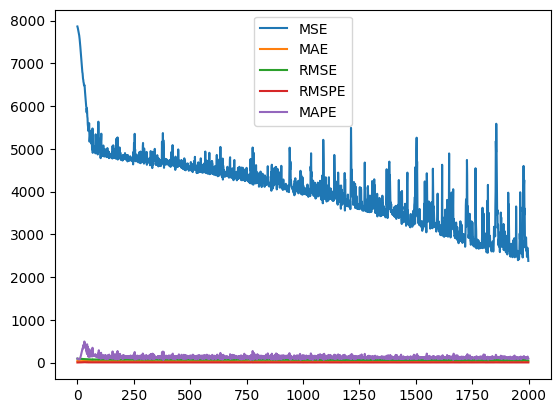

In [69]:
plt.plot(history_cA.history['mse'])
plt.plot(history_cA.history['mae'])
plt.plot(history_cA.history['rmse'])
plt.plot(history_cA.history['rmspe'])
plt.plot(history_cA.history['mape'])
plt.legend(['MSE', 'MAE', 'RMSE', "RMSPE", "MAPE"])
plt.show()

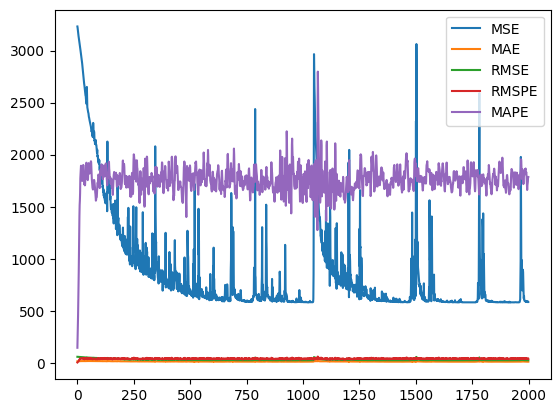

In [70]:
plt.plot(history_cD.history['mse'])
plt.plot(history_cD.history['mae'])
plt.plot(history_cD.history['rmse'])
plt.plot(history_cD.history['rmspe'])
plt.plot(history_cD.history['mape'])
plt.legend(['MSE', 'MAE', 'RMSE', "RMSPE", "MAPE"])
plt.show()

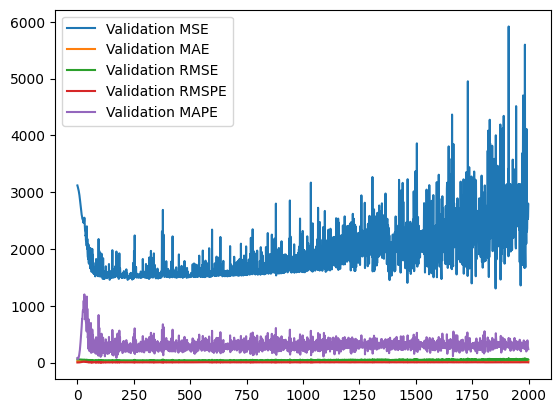

In [71]:
plt.plot(history_cA.history['val_mse'])
plt.plot(history_cA.history['val_mae'])
plt.plot(history_cA.history['val_rmse'])
plt.plot(history_cA.history['val_rmspe'])
plt.plot(history_cA.history['val_mape'])
plt.legend(['Validation MSE', 'Validation MAE', 'Validation RMSE', 'Validation RMSPE', 'Validation MAPE'])
plt.show()

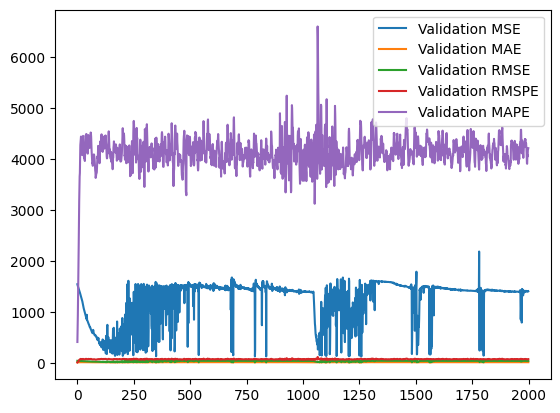

In [72]:
plt.plot(history_cD.history['val_mse'])
plt.plot(history_cD.history['val_mae'])
plt.plot(history_cD.history['val_rmse'])
plt.plot(history_cD.history['val_rmspe'])
plt.plot(history_cD.history['val_mape'])
plt.legend(['Validation MSE', 'Validation MAE', 'Validation RMSE', 'Validation RMSPE', 'Validation MAPE'])
plt.show()

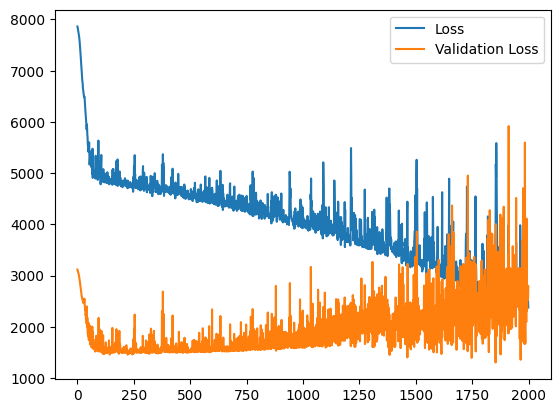

In [73]:
plt.plot(history_cA.history['loss'])
plt.plot(history_cA.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

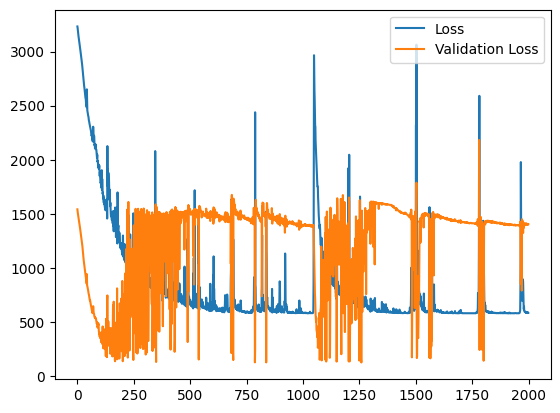

In [74]:
plt.plot(history_cD.history['loss'])
plt.plot(history_cD.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

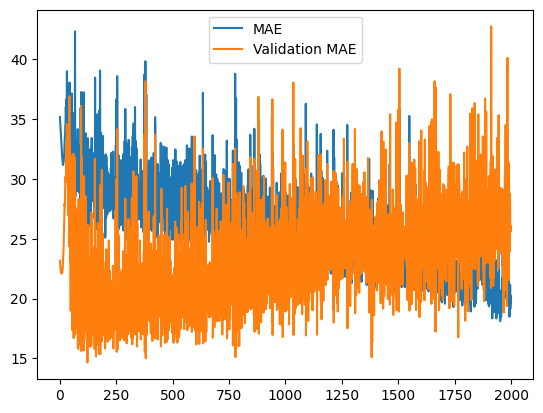

In [75]:
plt.plot(history_cA.history['mae'])
plt.plot(history_cA.history['val_mae'])
plt.legend(['MAE', 'Validation MAE'])
plt.show()

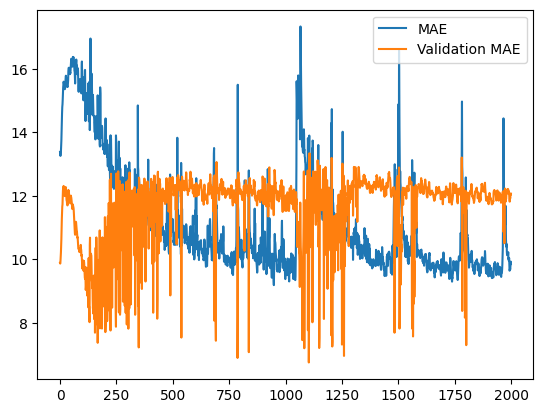

In [76]:
plt.plot(history_cD.history['mae'])
plt.plot(history_cD.history['val_mae'])
plt.legend(['MAE', 'Validation MAE'])
plt.show()

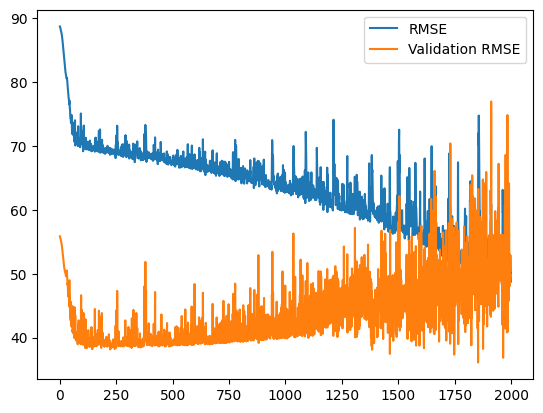

In [77]:
plt.plot(history_cA.history['rmse'])
plt.plot(history_cA.history['val_rmse'])
plt.legend(['RMSE', 'Validation RMSE'])
plt.show()

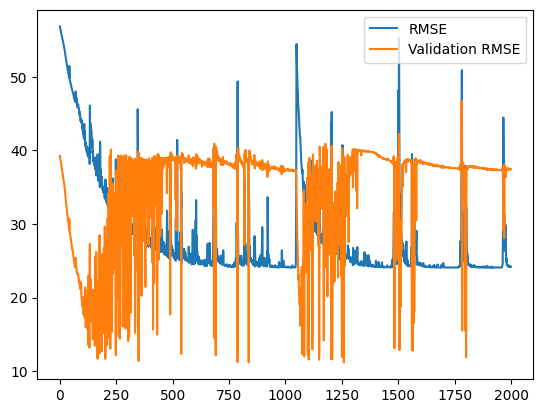

In [78]:
plt.plot(history_cD.history['rmse'])
plt.plot(history_cD.history['val_rmse'])
plt.legend(['RMSE', 'Validation RMSE'])
plt.show()

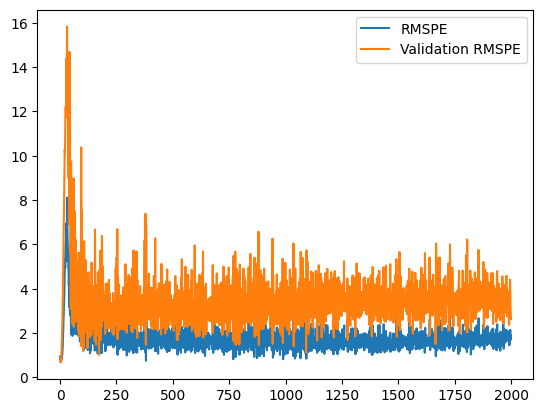

In [79]:
plt.plot(history_cA.history['rmspe'])
plt.plot(history_cA.history['val_rmspe'])
plt.legend(['RMSPE', 'Validation RMSPE'])
plt.show()

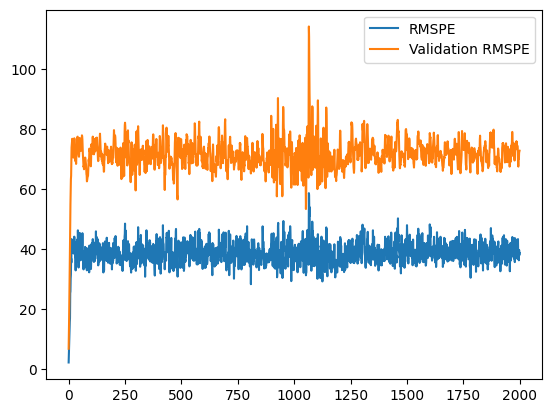

In [80]:
plt.plot(history_cD.history['rmspe'])
plt.plot(history_cD.history['val_rmspe'])
plt.legend(['RMSPE', 'Validation RMSPE'])
plt.show()

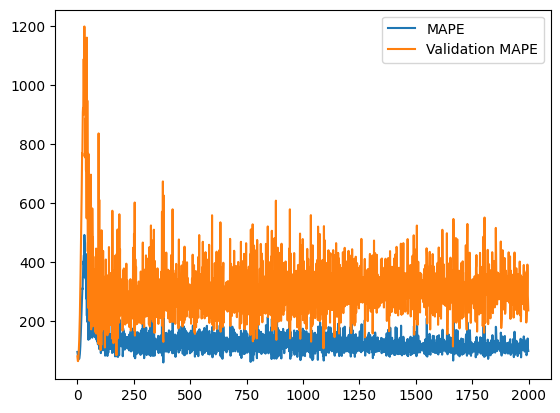

In [81]:
plt.plot(history_cA.history['mape'])
plt.plot(history_cA.history['val_mape'])
plt.legend(['MAPE', 'Validation MAPE'])
plt.show()

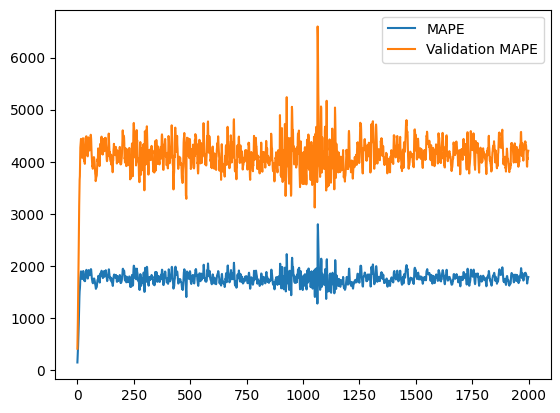

In [82]:
plt.plot(history_cD.history['mape'])
plt.plot(history_cD.history['val_mape'])
plt.legend(['MAPE', 'Validation MAPE'])
plt.show()

In [83]:
# predict all
def predict_all(model, X_test):
  preds = list()
  for x in X_test:
    x = x.reshape((1, n_steps, n_features))
    preds.extend(model.predict(x, verbose=0)[0])
  return preds

In [84]:
preds_wave_cA = predict_all(model_cA, get_cA(X_test_wave, num_level))
print(preds_wave_cA)

[10.410834, 11.094212, 11.224646, 14.182888, 22.90789, 82.407265, 82.48852, 6.1245, 9.095981, 12.370458, 90.67438, 18.398928, 19.898989, 43.60171, 116.8535, 147.75565, 184.1835, 216.88501, 2.7419605, 3.528627, 4.1039515, 4.445112, 4.6678405, 5.7814465, 8.462393]


In [85]:
for i in range(len(get_cA(y_test_wave, num_level))):
	print(y_test_wave[i],"; ", preds_wave_cA[i])

0.9738883 ;  10.410834
0.88472295 ;  11.094212
1.5052006 ;  11.224646
2.068202 ;  14.182888
3.3852868 ;  22.90789
5.1822176 ;  82.407265
27.3171 ;  82.48852
1.3313346 ;  6.1245
1.2125382 ;  9.095981
1.4263752 ;  12.370458
2.0421133 ;  90.67438
2.6850967 ;  18.398928
3.5984478 ;  19.898989
5.585558 ;  43.60171
11.126987 ;  116.8535
19.348053 ;  147.75565
48.38256 ;  184.1835
175.22604 ;  216.88501
2.838384 ;  2.7419605
2.9991932 ;  3.528627
6.011219 ;  4.1039515
4.7022743 ;  4.445112
3.2421603 ;  4.6678405
10.469797 ;  5.7814465
8.692641 ;  8.462393


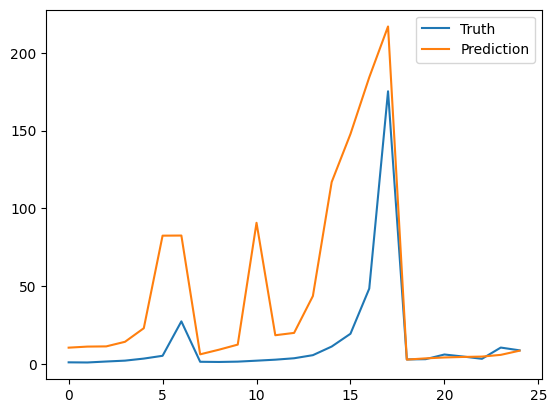

In [86]:
plt.plot(get_cA(y_test_wave, num_level))
plt.plot(preds_wave_cA)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [87]:
preds_wave_cD = predict_all(model_cD, get_cD(X_test_wave, 1, num_level))
print(preds_wave_cD)

[-5.5151815, -5.51518, -5.51518, -5.5151825, -5.5151815, -5.5151815, -5.51518, -5.686691, -5.6866913, -5.686691, -5.6866913, -5.6866913, -5.6866913, -5.686691, -5.6866913, -5.6866903, -5.6866903, -5.6866903, -5.602486, -5.6024857, -3.5499377, -5.519971, -5.5199685, -5.6596465, -3.7394862]


In [88]:
for i in range(len(get_cD(y_test_wave, 1, num_level))):
	print(get_cD(y_test_wave, 1, num_level)[i],"; ", preds_wave_cD[i])

-0.22026059 ;  -5.5151815
-0.15371898 ;  -5.51518
-0.1665281 ;  -5.51518
-0.20534897 ;  -5.5151825
-0.27197778 ;  -5.5151815
-0.07887721 ;  -5.5151815
-17.549892 ;  -5.51518
-0.16172642 ;  -5.686691
-0.037981212 ;  -5.6866913
-0.22719133 ;  -5.686691
-0.17207515 ;  -5.6866913
-0.35556853 ;  -5.6866913
-0.33409607 ;  -5.6866913
-0.30709553 ;  -5.686691
-1.7367358 ;  -5.6866913
-3.787745 ;  -5.6866903
-17.479858 ;  -5.6866903
-25.782433 ;  -5.6866903
-0.00801301 ;  -5.602486
0.5316616 ;  -5.6024857
4.1608286 ;  -3.5499377
0.12433672 ;  -5.519971
-0.7962569 ;  -5.5199685
-5.529299 ;  -5.6596465
7.9390135 ;  -3.7394862


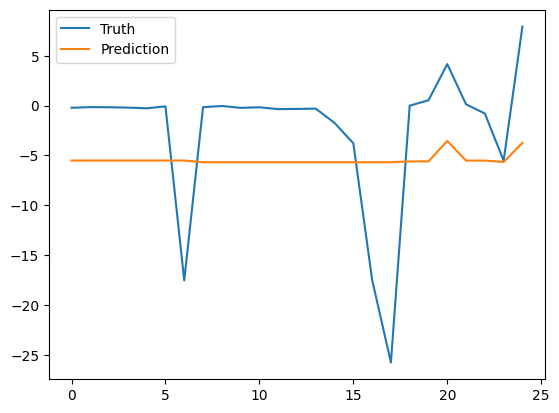

In [89]:
plt.plot(get_cD(y_test_wave, 1, num_level))
plt.plot(preds_wave_cD)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [90]:
model_cA.evaluate(get_cA(X_test_wave, num_level), get_cA(y_test_wave, num_level))

1/1 [==============================] - 0s 41ms/step - loss: 2708.5488 - mse: 2708.5488 - mae: 31.8565 - rmse: 52.0437 - rmspe: 10.5910 - mape: 621.1105


[2708.548828125,
 2708.548828125,
 31.856464385986328,
 52.04372024536133,
 10.59096908569336,
 621.1105346679688]

In [91]:
y_test_wave_cA_cumsum = np.cumsum(get_cA(y_test_wave, num_level))
y_test_wave_cA_cumsum

array([  0.9738883,   1.8586112,   3.363812 ,   5.432014 ,   8.817301 ,
        13.999518 ,  41.31662  ,  42.647953 ,  43.860493 ,  45.28687  ,
        47.328983 ,  50.01408  ,  53.612526 ,  59.198082 ,  70.32507  ,
        89.67313  , 138.0557   , 313.28174  , 316.12012  , 319.11932  ,
       325.13055  , 329.83282  , 333.07498  , 343.54477  , 352.2374   ],
      dtype=float32)

In [92]:
preds_wave_cA_cumsum = np.cumsum(preds_wave_cA)
preds_wave_cA_cumsum

array([  10.410834,   21.505047,   32.72969 ,   46.91258 ,   69.820465,
        152.22772 ,  234.71625 ,  240.84074 ,  249.93672 ,  262.3072  ,
        352.98157 ,  371.3805  ,  391.27948 ,  434.8812  ,  551.7347  ,
        699.49036 ,  883.6738  , 1100.5588  , 1103.3008  , 1106.8295  ,
       1110.9335  , 1115.3785  , 1120.0464  , 1125.8279  , 1134.2903  ],
      dtype=float32)

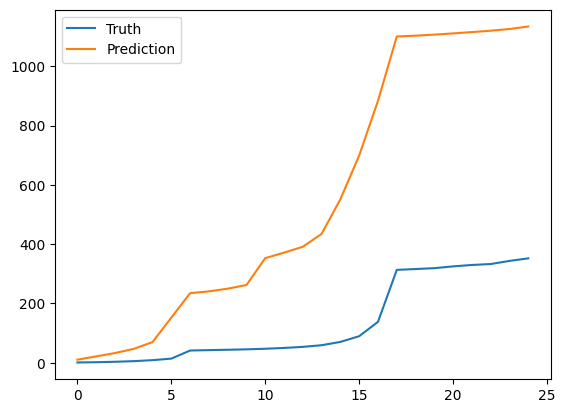

In [93]:
plt.plot(y_test_wave_cA_cumsum)
plt.plot(preds_wave_cA_cumsum)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [94]:
rmspe_score_wave_cA_cumsum = rmspe(y_test_wave_cA_cumsum, preds_wave_cA_cumsum)
rmspe_score_wave_cA_cumsum

<tf.Tensor: shape=(), dtype=float32, numpy=6.0169535>

In [95]:
mape_score_wave_cA_cumsum = tf.keras.metrics.mean_absolute_percentage_error(y_test_wave_cA_cumsum, preds_wave_cA_cumsum)
mape_score_wave_cA_cumsum

<tf.Tensor: shape=(), dtype=float32, numpy=543.7709>

## Evaluate model

### Normally

In [96]:
preds_wave_whole = (np.array(preds_wave_cA), np.array(preds_wave_cD))

In [97]:
preds = (pywt.waverec(preds_wave_whole, wavelet))

In [98]:
preds

array([ 3.46174908e+00,  1.12613935e+01,  3.94497061e+00,  1.17446136e+01,
        4.03720140e+00,  1.18368435e+01,  6.12899303e+00,  1.39286394e+01,
        1.22985020e+01,  2.00981464e+01,  5.43709106e+01,  6.21705551e+01,
        5.44283676e+01,  6.22280121e+01,  3.09577465e-01,  8.35177231e+00,
        2.41073132e+00,  1.04529276e+01,  4.72613668e+00,  1.27683315e+01,
        6.00953636e+01,  6.81375580e+01,  8.98890781e+00,  1.70311050e+01,
        1.00496111e+01,  1.80918083e+01,  2.68099689e+01,  3.48521652e+01,
        7.86068039e+01,  8.66489944e+01,  1.00457924e+02,  1.08500114e+02,
        1.26216301e+02,  1.34258499e+02,  1.49339752e+02,  1.57381958e+02,
       -2.02269697e+00,  5.90041494e+00, -1.46643949e+00,  6.45667171e+00,
        3.91746759e-01,  5.41211700e+00, -7.60039806e-01,  7.04637766e+00,
       -6.02545500e-01,  7.20386887e+00,  8.61253738e-02,  8.09007454e+00,
        3.33959913e+00,  8.62803078e+00], dtype=float32)

In [99]:
preds = preds

In [100]:
for i in range(len(y_test)):
	print(y_test[i],"; ", preds[i])

0.53289527 ;  3.461749
0.8443908 ;  11.261394
0.51689786 ;  3.9449706
0.7342893 ;  11.744614
0.94658446 ;  4.0372014
1.1820908 ;  11.8368435
1.3172361 ;  6.128993
1.6076434 ;  13.928639
2.201442 ;  12.298502
2.5860767 ;  20.098146
3.6086068 ;  54.37091
3.7201562 ;  62.170555
6.9064603 ;  54.428368
31.725756 ;  62.228012
0.82703793 ;  0.30957747
1.0557536 ;  8.351772
0.83053726 ;  2.4107313
0.8842508 ;  10.452928
0.847951 ;  4.7261367
1.1692481 ;  12.768332
1.3223168 ;  60.095364
1.5656677 ;  68.13756
1.6472254 ;  8.988908
2.1500752 ;  17.031105
2.3082454 ;  10.049611
2.7807286 ;  18.091808
3.7324367 ;  26.809969
4.166735 ;  34.852165
6.639911 ;  78.606804
9.096026 ;  86.648994
11.002799 ;  100.457924
16.35948 ;  108.500114
21.85151 ;  126.2163
46.571762 ;  134.2585
105.6726 ;  149.33975
142.13446 ;  157.38196
2.0013745 ;  -2.022697
2.0127065 ;  5.900415
2.4966915 ;  -1.4664395
1.7448084 ;  6.4566717
7.1927238 ;  0.39174676
1.3084234 ;  5.412117
3.4129295 ;  -0.7600398
3.2370908 ;  7.04

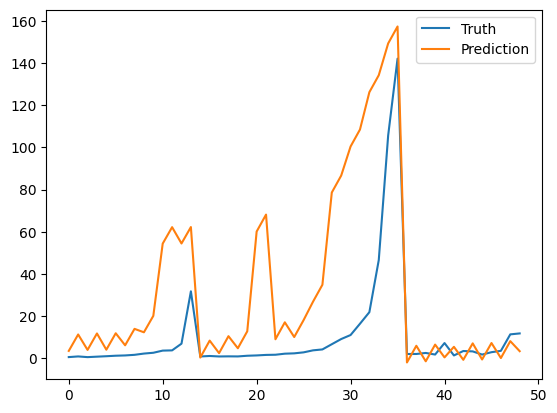

In [101]:
plt.plot(y_test)
plt.plot(preds)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [102]:
rmspe_score = rmspe(y_test, preds)
rmspe_score

<tf.Tensor: shape=(), dtype=float32, numpy=10.879656>

In [103]:
mape_score = tf.keras.metrics.mean_absolute_percentage_error(y_test, preds)
mape_score

<tf.Tensor: shape=(), dtype=float32, numpy=668.1747>

In [104]:
y_test_cumsum = np.cumsum(y_test)
y_test_cumsum

array([  0.53289527,   1.3772861 ,   1.8941839 ,   2.6284733 ,
         3.5750577 ,   4.7571487 ,   6.0743847 ,   7.682028  ,
         9.88347   ,  12.469546  ,  16.078154  ,  19.79831   ,
        26.70477   ,  58.430527  ,  59.257565  ,  60.313316  ,
        61.143852  ,  62.028103  ,  62.876053  ,  64.0453    ,
        65.36762   ,  66.93329   ,  68.58051   ,  70.73059   ,
        73.03883   ,  75.819565  ,  79.552     ,  83.718735  ,
        90.35864   ,  99.454666  , 110.457466  , 126.81695   ,
       148.66846   , 195.24022   , 300.9128    , 443.04727   ,
       445.04865   , 447.06134   , 449.55804   , 451.30286   ,
       458.49557   , 459.804     , 463.21692   , 466.454     ,
       468.18353   , 471.03912   , 474.5326    , 485.84567   ,
       497.60602   ], dtype=float32)

In [105]:
preds_cumsum = np.cumsum(preds)
preds_cumsum

array([   3.461749,   14.723143,   18.668114,   30.412727,   34.44993 ,
         46.286774,   52.415768,   66.344406,   78.64291 ,   98.74105 ,
        153.11197 ,  215.28253 ,  269.7109  ,  331.9389  ,  332.24847 ,
        340.60025 ,  343.011   ,  353.46393 ,  358.19006 ,  370.9584  ,
        431.05377 ,  499.19135 ,  508.18027 ,  525.21136 ,  535.261   ,
        553.3528  ,  580.1628  ,  615.01495 ,  693.62177 ,  780.27075 ,
        880.7287  ,  989.2288  , 1115.4451  , 1249.7036  , 1399.0433  ,
       1556.4253  , 1554.4026  , 1560.303   , 1558.8365  , 1565.2932  ,
       1565.6849  , 1571.097   , 1570.337   , 1577.3834  , 1576.7809  ,
       1583.9847  , 1584.0709  , 1592.161   , 1595.5006  ], dtype=float32)

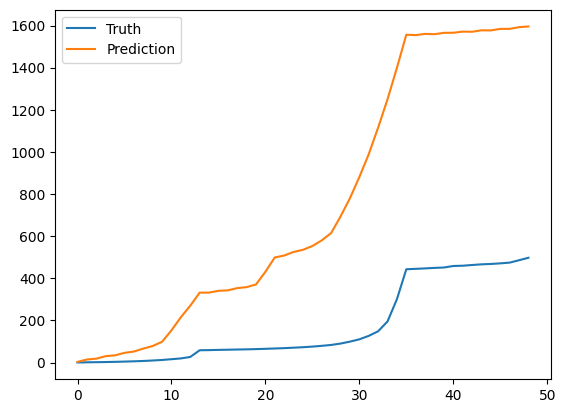

In [106]:
plt.plot(y_test_cumsum)
plt.plot(preds_cumsum)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [107]:
rmspe_score_cumsum = rmspe(y_test_cumsum, preds_cumsum)
rmspe_score_cumsum

<tf.Tensor: shape=(), dtype=float32, numpy=5.977142>

In [108]:
mape_score_cumsum = tf.keras.metrics.mean_absolute_percentage_error(y_test_cumsum, preds_cumsum)
mape_score_cumsum

<tf.Tensor: shape=(), dtype=float32, numpy=546.81134>

### cD replaced with zeroes

In [109]:
preds_wave_whole_zero = (np.array(preds_wave_cA), np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]))

In [110]:
preds_zero = (pywt.waverec(preds_wave_whole_zero, wavelet))

In [111]:
preds_zero = preds_zero

In [112]:
preds_zero

array([  7.36157154,   7.36157154,   7.84479224,   7.84479224,
         7.93702303,   7.93702303,  10.0288163 ,  10.0288163 ,
        16.19832459,  16.19832459,  58.2707357 ,  58.2707357 ,
        58.32819028,  58.32819028,   4.33067534,   4.33067534,
         6.4318296 ,   6.4318296 ,   8.74723449,   8.74723449,
        64.11646717,  64.11646717,  13.01000654,  13.01000654,
        14.07070987,  14.07070987,  30.83106571,  30.83106571,
        82.62790251,  82.62790251, 104.47901907, 104.47901907,
       130.23740339, 130.23740339, 153.36086114, 153.36086114,
         1.93885888,   1.93885888,   2.49511602,   2.49511602,
         2.9019319 ,   2.9019319 ,   3.143169  ,   3.143169  ,
         3.30066166,   3.30066166,   4.08809999,   4.08809999,
         5.98381534])

In [113]:
for i in range(len(y_test)):
	print(y_test[i],"; ", preds_zero[i])

0.53289527 ;  7.361571540135181
0.8443908 ;  7.361571540135181
0.51689786 ;  7.84479223898313
0.7342893 ;  7.84479223898313
0.94658446 ;  7.93702303051649
1.1820908 ;  7.93702303051649
1.3172361 ;  10.028816303533764
1.6076434 ;  10.028816303533764
2.201442 ;  16.198324587825375
2.5860767 ;  16.198324587825375
3.6086068 ;  58.270735695102985
3.7201562 ;  58.270735695102985
6.9064603 ;  58.328190278993034
31.725756 ;  58.328190278993034
0.82703793 ;  4.330675338414901
1.0557536 ;  4.330675338414901
0.83053726 ;  6.431829595073839
0.8842508 ;  6.431829595073839
0.847951 ;  8.747234490152207
1.1692481 ;  8.747234490152207
1.3223168 ;  64.11646716868688
1.5656677 ;  64.11646716868688
1.6472254 ;  13.010006535169024
2.1500752 ;  13.010006535169024
2.3082454 ;  14.07070986532172
2.7807286 ;  14.07070986532172
3.7324367 ;  30.83106571261296
4.166735 ;  30.83106571261296
6.639911 ;  82.62790251433248
9.096026 ;  82.62790251433248
11.002799 ;  104.47901906980336
16.35948 ;  104.47901906980336
2

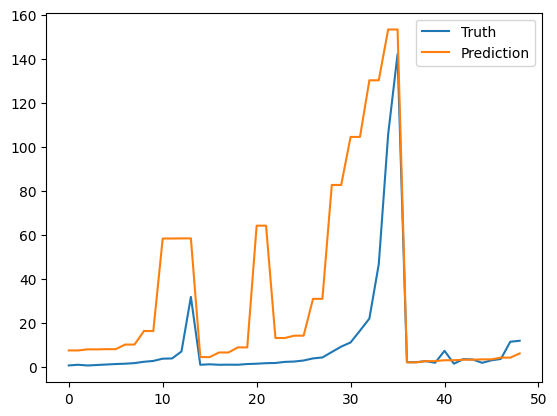

In [114]:
plt.plot(y_test)
plt.plot(preds_zero)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [115]:
rmspe_score_zero = rmspe(y_test, preds_zero)
rmspe_score_zero

<tf.Tensor: shape=(), dtype=float64, numpy=10.951086700808245>

In [116]:
mape_score_zero = tf.keras.metrics.mean_absolute_percentage_error(y_test, preds_zero)
mape_score_zero

<tf.Tensor: shape=(), dtype=float64, numpy=658.9803362318486>

In [117]:
y_test_cumsum = np.cumsum(y_test)
y_test_cumsum

array([  0.53289527,   1.3772861 ,   1.8941839 ,   2.6284733 ,
         3.5750577 ,   4.7571487 ,   6.0743847 ,   7.682028  ,
         9.88347   ,  12.469546  ,  16.078154  ,  19.79831   ,
        26.70477   ,  58.430527  ,  59.257565  ,  60.313316  ,
        61.143852  ,  62.028103  ,  62.876053  ,  64.0453    ,
        65.36762   ,  66.93329   ,  68.58051   ,  70.73059   ,
        73.03883   ,  75.819565  ,  79.552     ,  83.718735  ,
        90.35864   ,  99.454666  , 110.457466  , 126.81695   ,
       148.66846   , 195.24022   , 300.9128    , 443.04727   ,
       445.04865   , 447.06134   , 449.55804   , 451.30286   ,
       458.49557   , 459.804     , 463.21692   , 466.454     ,
       468.18353   , 471.03912   , 474.5326    , 485.84567   ,
       497.60602   ], dtype=float32)

In [118]:
preds_cumsum_zero = np.cumsum(preds_zero)
preds_cumsum_zero

array([   7.36157154,   14.72314308,   22.56793532,   30.41272756,
         38.34975059,   46.28677362,   56.31558992,   66.34440623,
         82.54273081,   98.7410554 ,  157.0117911 ,  215.28252679,
        273.61071707,  331.93890735,  336.26958269,  340.60025803,
        347.03208762,  353.46391722,  362.21115171,  370.9583862 ,
        435.07485337,  499.19132053,  512.20132707,  525.21133361,
        539.28204347,  553.35275334,  584.18381905,  615.01488476,
        697.64278728,  780.27068979,  884.74970886,  989.22872793,
       1119.46613132, 1249.7035347 , 1403.06439585, 1556.42525699,
       1558.36411587, 1560.30297475, 1562.79809077, 1565.2932068 ,
       1568.1951387 , 1571.0970706 , 1574.2402396 , 1577.3834086 ,
       1580.68407026, 1583.98473192, 1588.07283191, 1592.16093191,
       1598.14474724])

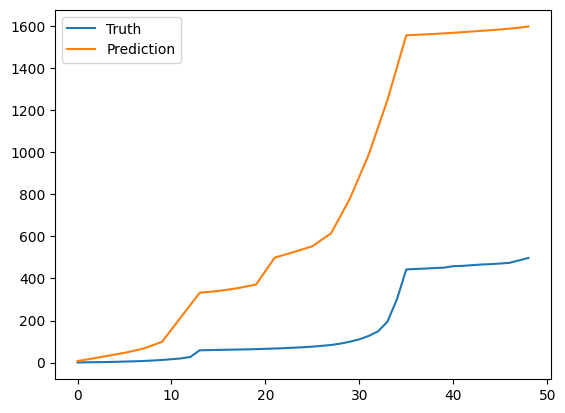

In [119]:
plt.plot(y_test_cumsum)
plt.plot(preds_cumsum_zero)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [120]:
rmspe_score_cumsum_zero = rmspe(y_test_cumsum, preds_cumsum_zero)
rmspe_score_cumsum_zero

<tf.Tensor: shape=(), dtype=float64, numpy=6.3478877934570646>

In [121]:
mape_score_cumsum_zero = tf.keras.metrics.mean_absolute_percentage_error(y_test_cumsum, preds_cumsum_zero)
mape_score_cumsum_zero

<tf.Tensor: shape=(), dtype=float64, numpy=572.3039256889671>

## Compare

In [122]:
print(rmspe_score, rmspe_score_zero)

tf.Tensor(10.879656, shape=(), dtype=float32) tf.Tensor(10.951086700808245, shape=(), dtype=float64)


In [123]:
print(mape_score, mape_score_zero)

tf.Tensor(668.1747, shape=(), dtype=float32) tf.Tensor(658.9803362318486, shape=(), dtype=float64)


In [124]:
print(rmspe_score_cumsum, rmspe_score_cumsum_zero)

tf.Tensor(5.977142, shape=(), dtype=float32) tf.Tensor(6.3478877934570646, shape=(), dtype=float64)


In [125]:
print(mape_score_cumsum, mape_score_cumsum_zero)

tf.Tensor(546.81134, shape=(), dtype=float32) tf.Tensor(572.3039256889671, shape=(), dtype=float64)


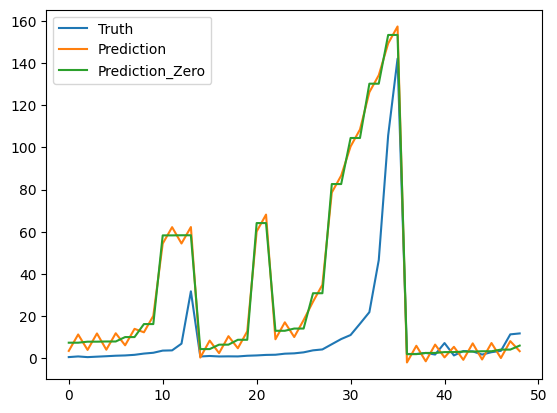

In [126]:
plt.plot(y_test)
plt.plot(preds)
plt.plot(preds_zero)
plt.legend(['Truth', 'Prediction', 'Prediction_Zero'])
plt.show()

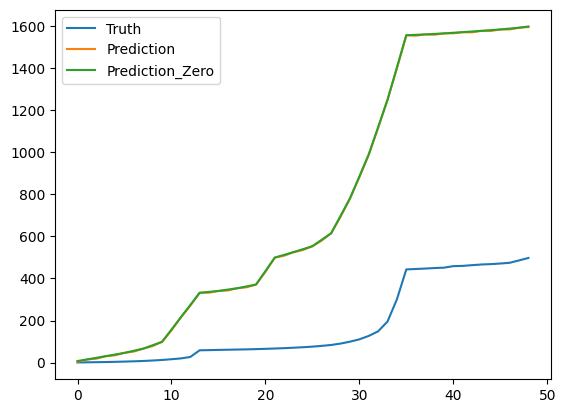

In [127]:
plt.plot(y_test_cumsum)
plt.plot(preds_cumsum)
plt.plot(preds_cumsum_zero)
plt.legend(['Truth', 'Prediction', 'Prediction_Zero'])
plt.show()

# ---------------------------------------------------------------------------------------------------------------------------------------------

In [128]:
model.save('cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf')

NameError: ignored

In [ ]:
!zip -r /content/"cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf".zip /content/"cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf"

In [ ]:
loaded_1 = tf.keras.models.load_model("cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf")

In [ ]:
loaded_1.evaluate(X_test, y_test)

# data -> frequency

In [ ]:
def get_wave(data, mode, num_level):
  wave = []
  for i in range(len(data)):
    wave.append(pywt.wavedec([data[i]], mode, level = num_level))
  return np.array(wave).T[0]

In [ ]:
mode = 'haar'

## 1 levels

In [ ]:
num_level = 1

In [ ]:
lc_wave1 = get_wave(lc, mode, num_level)

In [ ]:
lc_wave1

In [ ]:
# Plot cA
plt.plot(lc_wave1[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(lc_wave1[1])
plt.show()

## 2 levels

In [ ]:
num_level = 2

In [ ]:
lc_wave2 = get_wave(lc, mode, num_level)

In [ ]:
lc_wave2

In [ ]:
# Plot cA
plt.plot(lc_wave2[0])
plt.show()

In [ ]:
# Plot cD1
plt.plot(lc_wave2[1])
plt.show()

In [ ]:
# Plot cD2
plt.plot(lc_wave2[2])
plt.show()

## 3 levels

In [ ]:
num_level = 3

In [ ]:
lc_wave3 = get_wave(lc, mode, num_level)

In [ ]:
lc_wave3

In [ ]:
# Plot cA
plt.plot(lc_wave3[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(lc_wave3[1])
plt.show()

In [ ]:
plt.plot(lc_wave1[0])
plt.plot(lc_wave2[0])
plt.plot(lc_wave3[0])
plt.legend(['A1', 'A2', 'A3'])
plt.show()

# **Temperature**

# data -> frequency

## level 1

In [ ]:
num_level = 1

In [ ]:
temp_wave1 = get_wave(temp_new, mode, num_level)

In [ ]:
temp_wave1

In [ ]:
# Plot cA
plt.plot(temp_wave1[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(temp_wave1[1])
plt.show()

## level 2

In [ ]:
num_level = 2

In [ ]:
temp_wave2 = get_wave(temp_new, mode, num_level)

In [ ]:
temp_wave2

In [ ]:
# Plot cA
plt.plot(temp_wave2[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(temp_wave2[1])
plt.show()

In [ ]:
# Plot cA
plt.plot(temp_wave1[0])
plt.plot(temp_wave2[0])
plt.show()